In [66]:
import numpy as np
from numpy import array, sin, cos, dot, random
from scipy.optimize import minimize
from scipy.linalg import solve, norm
from math import pi
import matplotlib.pyplot as plt
from matplotlib import animation,rc
%matplotlib inline
from IPython.display import HTML

In [63]:
def acrobot_motion(x, u):
    friction = 0.1
    g = 9.8
    M = array([[3 + 2*cos(x[1]), 1+cos(x[1])],[1+cos(x[1]), 1]])
    c1 = x[3]*(2*x[2]+x[3])*sin(x[1]) + 2*g*sin(x[0]) + g*sin(x[0]+x[1])
    c2 = -x[2]**2*sin(x[1]) + g*sin(x[0]+x[1])
    a = np.concatenate([x[2:4], solve(M,array([c1-friction*x[2], c2-friction*x[3]]))])
    B = np.concatenate([[0,0],solve(M,array([0,1]))])
    xd = a + B*u
    return xd

cost_function = lambda x,u,r,k : r/2*u**2 + 1 - exp(k*cos(x1) + k*cos(x2)-2*k)

n=100
dt=0.1

cost_function = lambda x,u : u**2

def lagrangian(input_array):
    #x is x1 to xN-1,followed by U0 to UN-1, followed by lambda0 to lambdaN-1
    x = np.concatenate([[pi,0,0,0],input_array[:(n-1)*4],[0,0,0,0]])
    u = input_array[(n-1)*4:(n-1)*4+n]
    lam = input_array[(n-1)*4+n:-1]
    #print(lam.shape)
    L=0
    for i in range(n-1):
        xx = x[i*4:(i+1)*4]
        xx_p1 = x[(i+1)*4:(i+2)*4]
        delta = xx+dt*acrobot_motion(xx,u[i])-xx_p1
        cost = cost_function(xx,u[i])
        lagragian_term = lam[i]*norm(delta[0:1]%(2*pi))
        L+=cost+lagragian_term
    return L
init = np.ones((n-1)*4+n+n)
out = minimize(lagrangian,init)

In [47]:
# plot


array([        0.        , -26650117.91403154,         0.        ,
               0.        ])

In [61]:

Duration = 20;
FPS = 30;
dt = 1/FPS

N = round(Duration*FPS);
xinit = zeros(4)+0.1*random(4);
u = zeros(N)

x = zeros([N,4])
x[0]=xinit
for i in range(N-1):
    x[i+1]=x[i]+dt*acrobot_motion(x[i],u[i])

for k in range(N):
##########
    x1 = cos(y(k,1)+pi/2);
    y1 = sin(y(k,1)+pi/2);
    x2 = x1 + cos(y(k,1)+y(k,2)+pi/2);
    y2 = y1 + sin(y(k,1)+y(k,2)+pi/2);
    plot([0 x1 x2], [0 y1 y2], 'o-');
    axis([-2.2 2.2 -2.2 2.2]);
    title(sprintf('%.2f sec', toc));
    drawnow;
    pause(k/FPS - toc);
end

array([ -8.59273787e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,  -1.74317385e+00,  -1.74317385e+00,
        -1.74317385e+00,

In [65]:
out


      fun: -17.93615443335054
 hess_inv: array([[  1.02406190e+00,   0.00000000e+00,   2.64848167e-03, ...,
          2.64848167e-03,   1.63112297e-01,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.64848167e-03,   0.00000000e+00,   1.00020992e+00, ...,
          2.09920045e-04,   1.24818052e-02,   0.00000000e+00],
       ..., 
       [  2.64848167e-03,   0.00000000e+00,   2.09920045e-04, ...,
          1.00020992e+00,   1.24818052e-02,   0.00000000e+00],
       [  1.63112297e-01,   0.00000000e+00,   1.24818052e-02, ...,
          1.24818052e-02,   1.47297910e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])
      jac: array([  2.76007271e+00,   0.00000000e+00,   8.68358612e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         8.68358612e-02,   0.000

In [20]:
M

array([[ 2.16770633,  0.58385316],
       [ 0.58385316,  1.        ]])

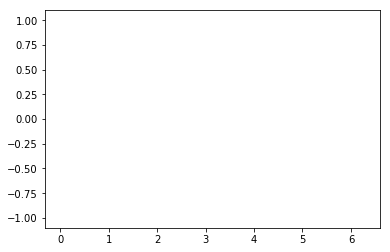

In [68]:
def grad_lagrangian_trick(u):
    # u is a vector of u0 to uN-1
    n=len(u)
    x = zeros([n+1,4])
    x[0]=array([0,0,0,0])
    lam = zeros(n+1)
    lam[n] = 0
    out = zeros(n)
    
    for i in range(n):
        x[i+1]=acrobot_motion(x[i],u[i])

    for i in reversed(range(n)):
        lam[i−1]=dgdx(x[i],u[i])+dfdx(x[i],u[i])*lam[i]
    
    for i in range(n):
        out[i]=dgdu(x[i],u[i])+lam[i]*dfdu[i]
    return out